# Natural Language Processing Notebook & Sentiment Analysis
## Module 3b



**Some Useful Resources used during the coding process**
<br>
https://towardsdatascience.com/airbnb-part-b-python-interactive-map-natural-language-processing-48d472f14da3

<br>

https://github.com/Lukastuong123/Python/blob/master/Project-%20Airbnb%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing%2C%20Comparative%20Study%2C%20Regression)/Project.%20AirBnB%20Part%20B%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing)%20.ipynb 

<br>

https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data

In [1]:
# conda install -c conda-forge wordcloud

In [1]:
###### Import packages ######

# Standard libraries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import time
import datetime

# Interactive Map
!pip install folium
import folium
from folium.plugins import FastMarkerCluster

# Natural Language processing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

# Sentiment Analysis

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabrizio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
###### Import Data ######
reviews = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/reviews.csv.gz', 
                      compression='gzip', 
                      header=0, 
                      sep=',', 
                      quotechar='"')

listings = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/listings.csv.gz', 
                       compression='gzip', 
                       header=0, 
                       sep=',', 
                       quotechar='"')

# Visualizing the data on a map #

In [4]:
reviews.head()
#listings.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [3]:
interesting_columns = ["id","description","host_id","host_name","neighbourhood_cleansed",
                       "latitude","longitude","property_type","room_type",
                       "review_scores_rating","reviews_per_month"]

cleansed_listings = listings[interesting_columns].rename(columns={"neighbourhood_cleansed": "neighbourhood"})
cleansed_listings.head()

,id,description,host_id,host_name,neighbourhood,latitude,longitude,property_type,room_type,review_scores_rating,reviews_per_month
0,13913,My bright double bedroom with a large window h...,54730,Alina,Islington,51.56861,-0.11270,Private room in rental unit,Private room,4.86,0.16
1,15400,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,4.79,0.61
2,17402,You'll have a wonderful stay in this superb mo...,67564,Liz,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,4.69,0.33
3,17506,Enjoy a chic stay in this elegant but fully mo...,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,NaN,NaN
4,25123,Big room with double bed/ clean sheets/ clean ...,103583,Grace,Barnet,51.57438,-0.21081,Private room in residential home,Private room,4.78,0.91


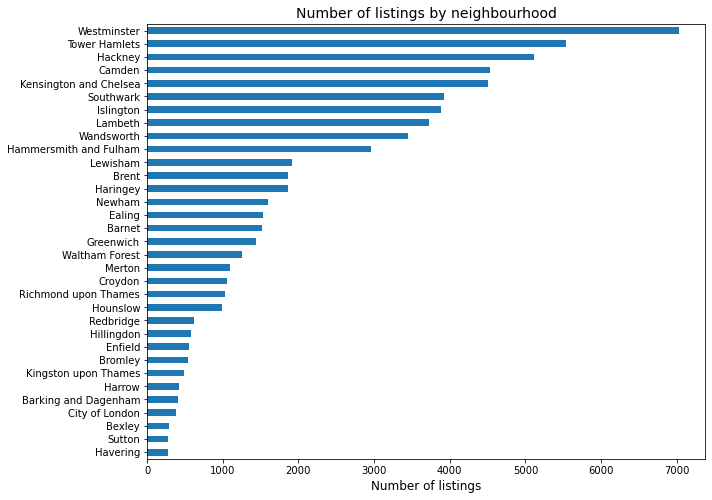

In [4]:
# Neighborhood distribution according to number (count) of listings -- Bar Plot
feq = cleansed_listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10,8))
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

In [5]:
# Some visitor firendly and popular tourist attractions of London
london_attractive_spots = {"name":["Soho",
                                   "Trafalgar Square",
                                   "Big Ben",
                                   "The Gherkin",
                                   "The Shard",
                                   "Globe Theater",
                                   "Tower of London",
                                   "Westminster Abbey",
                                   "Buckingham Palace",
                                   "London Eye",
                                   "Harry Potter Exhibit (Warner Bros.)",
                                   "Tower Bridge","Millennium Bridge","Notting Hill"],
                         "lat":[51.5136,
                                51.5080,
                                51.5007,
                                51.5145,
                                51.5045,
                                51.5081,
                                51.5081,
                                51.4994,
                                51.5014,
                                51.5033,
                                51.6903,
                                51.5055,
                                51.5095,
                                51.5160],
                         "long":[-0.1365,
                                 -0.1281,
                                 -0.1246,
                                 -0.0803,
                                 -0.0865,
                                 -0.0972,
                                 -0.0759,
                                 -0.1273,
                                 -0.1419,
                                 -0.1196,
                                 -0.4181,
                                 0.0754,
                                 -0.0985,
                                 -0.2090]}

london_attractive_spots_df = pd.DataFrame.from_dict(london_attractive_spots)
london_attractive_spots_df

,name,lat,long
0,Soho,51.5136,-0.1365
1,Trafalgar Square,51.5080,-0.1281
2,Big Ben,51.5007,-0.1246
3,The Gherkin,51.5145,-0.0803
4,The Shard,51.5045,-0.0865
5,Globe Theater,51.5081,-0.0972
6,Tower of London,51.5081,-0.0759
7,Westminster Abbey,51.4994,-0.1273
8,Buckingham Palace,51.5014,-0.1419
9,London Eye,51.5033,-0.1196


In [6]:
# Neighborhood distribution according to number (count) of listings -- Map View
latitude = cleansed_listings['latitude'].tolist()
longitude =cleansed_listings['longitude'].tolist()

locations = list(zip(latitude,longitude))

neighbourhood_map = folium.Map(location = [cleansed_listings["latitude"].mean(),0],
                        zoom_start = 11, 
                        control_scale=True,
                       tiles = 'OpenStreetMap')

london_attractive_spots_df.apply(lambda row:folium.Marker(location=[row["lat"],
                                                                          row["long"]], 
                                                                radius=10, 
                                                                popup=row['name']).add_to(neighbourhood_map), axis=1)

FastMarkerCluster(data=locations).add_to(neighbourhood_map)
neighbourhood_map

In [9]:
# Enriching reviews.csv with host_id, host_name, review_scores_rating

host_data = cleansed_listings[["id","host_id","host_name","review_scores_rating"]].rename(columns={"id":"listing_id","review_scores_rating":"rating"})

enriched_reviews = pd.merge(reviews, host_data, on = "listing_id", how = "left")
#enriched_reviews.set_index('id',inplace=True)
enriched_reviews.reset_index(inplace=True)
enriched_reviews.head()

,index,listing_id,id,date,reviewer_id,reviewer_name,comments,host_id,host_name,rating
0,0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,54730,Alina,4.86
1,1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,54730,Alina,4.86
2,2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,54730,Alina,4.86
3,3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",54730,Alina,4.86
4,4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",54730,Alina,4.86


<br>
<br>
<br>

# Narural Language Processing#

In [10]:
# Checking out some comments
enriched_reviews.comments.values[5]

"I'm very happy to have been Alina's guest! We've had great time in London and enjoyed our stay. Alina is a great host, we felt us so welcomed by her! \r<br/>Alina's house location is very convenient, it's only 5 min walk to Finsbury Park tube station and also a direct (Picadilly) line to Heathrow Airport (in case yu have an early departure you can use the opportunity to sleep a bit in the train :) \r<br/>The flat itself is very nice and clean and comfortable, especially the double-bed with new mattress, I slept like a newborn :) And also the red sofa on the small roof terrace is great, I enjoyed the last night London sky!\r<br/>To all who is going to visit London I highly reccomend Alina and her beautiful house to stay in. Alina, thank you so much and I hope to see you one day again!"

In [11]:
# Checking NA's
enriched_reviews.isna().sum()

index              0
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         494
host_id            0
host_name        749
rating             0
dtype: int64

In [12]:
enriched_reviews.shape
# 1,043,004 comments if we lose 749+494+1 = 1,244, it represents only 0.12% of the data, since it is small enough we will drop the missing values.

(1043004, 10)

In [13]:
enriched_reviews.dropna(inplace=True)
enriched_reviews.shape

(1041760, 10)

In [14]:
# Creating the stopwords, and other words we want to remove from the comments.
# After some analysis, there were a lot of French comments, hence we will also use French stopwords (honhonhon)

stop_english = set(stopwords.words("english"))
stop_french = set(stopwords.words("french"))

additional_stop = set({'airbnb','etc','quite','made','london','place',
                       'us','too','everything','day','get'})

union_set = stop_english|stop_french|additional_stop

In [15]:
# Cleaning the text data -- First Test

enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\d+','')                             # remove numbers 

enriched_reviews['comments'] = enriched_reviews['comments'].str.lower()                                       # lowercase

enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\r\n',"")                            # remove windows new line

enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\r<br/>',"")                         # remove html new line
enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\r<br>',"")                         # remove html new line
enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\r</br>',"")                         # remove html new line

enriched_reviews['comments'] = enriched_reviews['comments'].apply(lambda x: " ".join([i for i in x.split()
if i not in (union_set)]))                                                                                 # remove all the stop words with nltk library

enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('[^\w\s]'," ")                        # remove all punctuation

enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\s+', ' ')                           #replace x spaces by one space

enriched_reviews['comments'].values[5]

/var/folders/g3/_2prql4920ldswdg646nzwqm0000gn/T/ipykernel_3055/1467110326.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\d+','')                             # remove numbers
/var/folders/g3/_2prql4920ldswdg646nzwqm0000gn/T/ipykernel_3055/1467110326.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('[^\w\s]'," ")                        # remove all punctuation
/var/folders/g3/_2prql4920ldswdg646nzwqm0000gn/T/ipykernel_3055/1467110326.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  enriched_reviews['comments'] = enriched_reviews['comments'].str.replace('\s+', ' ')                           #replace x spaces by one space


'i m happy alina s guest we ve great time enjoyed stay alina great host felt welcomed her alina s house location convenient min walk finsbury park tube station also direct picadilly line heathrow airport in case yu early departure use opportunity sleep bit train flat nice clean comfortable especially double bed new mattress slept like newborn also red sofa small roof terrace great enjoyed last night sky to going visit highly reccomend alina beautiful house stay in alina thank much hope see one again '

In [16]:
enriched_reviews.head(5)

,index,listing_id,id,date,reviewer_id,reviewer_name,comments,host_id,host_name,rating
0,0,13913,80770,2010-08-18,177109,Michael,girlfriend known alina took leap faith rent fl...,54730,Alina,4.86
1,1,13913,367568,2011-07-11,19835707,Mathias,alina really good host flat clean tidy really ...,54730,Alina,4.86
2,2,13913,529579,2011-09-13,1110304,Kristin,alina amazing host feel right home like hangin...,54730,Alina,4.86
3,3,13913,595481,2011-10-03,1216358,Camilla,alina s nice room big clean bed huge alina gre...,54730,Alina,4.86
4,4,13913,612947,2011-10-09,490840,Jorik,nice location islington area good short busine...,54730,Alina,4.86


In [17]:
enriched_reviews['comments'].values[10000]

'très bel appartement secteur tranquille deux minutes tube tower hill tous services distance marche '

In [18]:
#Top 10 common words in the comments with CountVectorizer()
texts= enriched_reviews.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
110,great,494181
1120,br,483184
54,stay,438647
129,location,320474
73,clean,279824
72,host,259678
105,nice,229839
106,room,219711
101,would,210202
7,flat,209444


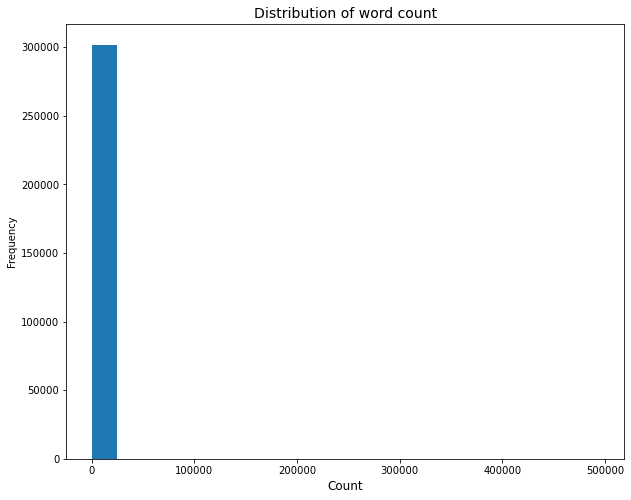

In [19]:
# The distribution of word counts
feq = cvec_df["counts"]
feq.plot.hist(figsize=(10,8), bins = 20)
plt.title('Distribution of word count', fontsize=14)
plt.xlabel('Count', fontsize = 12)
plt.show()

In [20]:
cvec_df.shape

(301957, 2)

In [21]:
cvec_df["counts"].describe()

count    301957.000000
mean         86.317065
std        2540.498659
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      494181.000000
Name: counts, dtype: float64

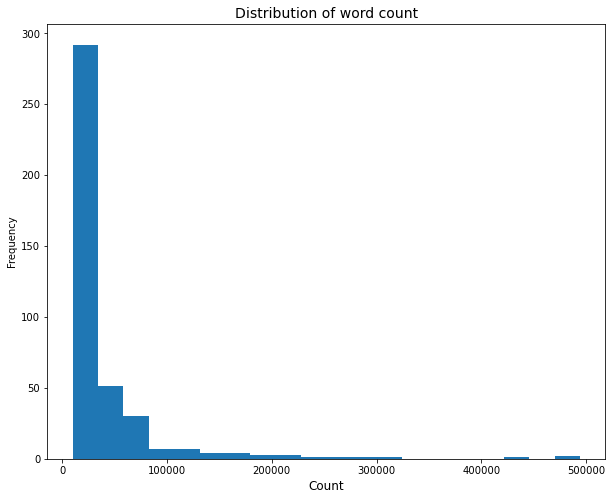

In [22]:
# Since we have 1,043,004 comments we will be removing words which appear at least 10,000 
# as the distribution is extremely skewed
clean_cvec_df = cvec_df[(cvec_df["counts"] > 10000)]
feq = clean_cvec_df["counts"]
feq.plot.hist(figsize=(10,8), bins = 20)
plt.title('Distribution of word count', fontsize=14)
plt.xlabel('Count', fontsize = 12)
plt.show()

In [23]:
clean_cvec_df.shape

(408, 2)

In [24]:
clean_cvec_df["counts"].describe()

count       408.000000
mean      39079.365196
std       56486.839488
min       10018.000000
25%       13839.000000
50%       19693.500000
75%       38768.250000
max      494181.000000
Name: counts, dtype: float64

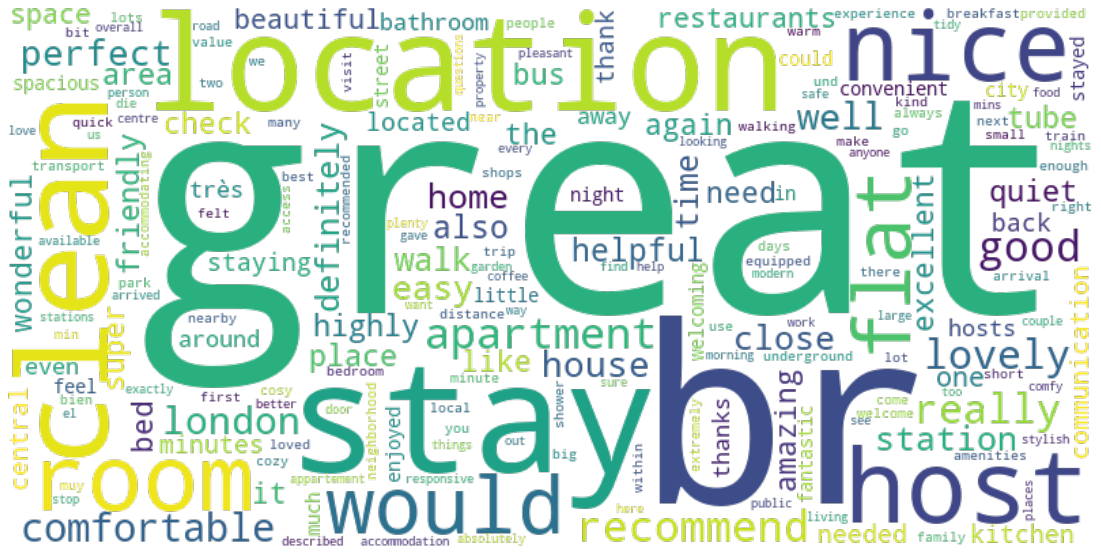

In [25]:
#Create the word cloud from the file we have 
cvec_dict = dict(zip(clean_cvec_df.words, clean_cvec_df.counts))

wordcloud = WordCloud(width=800, height=400, mode = 'RGBA',
                      max_words = 200, background_color=None) 

wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()